In [485]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [486]:
# Load the data
flights_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v2.csv")

In [487]:
tswift_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\extra_fun_data\Taylor_Swift_Eras_Tour.csv")


In [488]:
tswift_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Tour Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Countdown!,Date,City,Stadium,Opener 1,Opener 2,Notes,NaN,NaN,NaN,NaN
3,NaN,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN,NaN,NaN,NaN
4,NaN,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN,NaN,NaN,NaN


In [489]:
nan_columns = tswift_df.columns[tswift_df.isna().all()].tolist()
print(nan_columns)

['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']


In [490]:
# Drop columns that are 100% NaN
tswift_df = tswift_df.dropna(axis=1, how='all')

# Drop rows that are 100% NaN
tswift_df = tswift_df.dropna(axis=0, how='all')


In [491]:
non_nan_rows = tswift_df[tswift_df['Unnamed: 1'].notna()]
print(non_nan_rows)


     Unnamed: 1         Unnamed: 2                            Unnamed: 3  \
1    Tour Dates                NaN                                   NaN   
2    Countdown!               Date                                  City   
125       #NUM!  Wed, Jul 24, 2024                                   NaN   
126           0  Sat, Jul 27, 2024                       Munich, Germany   
127           1  Sun, Jul 28, 2024                                   NaN   
128           5   Thu, Aug 1, 2024                        Warsaw, Poland   
129           6   Fri, Aug 2, 2024                                   NaN   
130           7   Sat, Aug 3, 2024                                   NaN   
131          12   Thu, Aug 8, 2024                       Vienna, Austria   
132          13   Fri, Aug 9, 2024                                   NaN   
133          14  Sat, Aug 10, 2024                                   NaN   
134          19  Thu, Aug 15, 2024                London, United Kingdom   
135         

In [492]:
tswift_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 11
1,Tour Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Countdown!,Date,City,Stadium,Opener 1,Opener 2,Notes,NaN
3,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN
4,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN
5,NaN,"Fri, Mar 24, 2023","Las Vegas, NV",ALLEGIANT STADIUM,beabadoobee,GAYLE,NaN,NaN


In [493]:

# Drop the first two rows using iloc
tswift_df = tswift_df.iloc[2:].reset_index(drop=True)

# Display the updated DataFrame
print(tswift_df.head())


  Unnamed: 1         Unnamed: 2     Unnamed: 3          Unnamed: 4  \
0        NaN  Fri, Mar 17, 2023   Glendale, AZ  STATE FARM STADIUM   
1        NaN  Sat, Mar 18, 2023            NaN                 NaN   
2        NaN  Fri, Mar 24, 2023  Las Vegas, NV   ALLEGIANT STADIUM   
3        NaN  Sat, Mar 25, 2023            NaN                 NaN   
4        NaN  Fri, Mar 31, 2023  Arlington, TX        AT&T STADIUM   

    Unnamed: 5 Unnamed: 6     Unnamed: 7 Unnamed: 11  
0     Paramore      GAYLE  Opening Night         NaN  
1     Paramore      GAYLE            NaN         NaN  
2  beabadoobee      GAYLE            NaN         NaN  
3  beabadoobee      GAYLE            NaN         NaN  
4         MUNA      GAYLE            NaN         NaN  


In [494]:
tswift_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 11
0,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN
1,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN
2,NaN,"Fri, Mar 24, 2023","Las Vegas, NV",ALLEGIANT STADIUM,beabadoobee,GAYLE,NaN,NaN
3,NaN,"Sat, Mar 25, 2023",NaN,NaN,beabadoobee,GAYLE,NaN,NaN
4,NaN,"Fri, Mar 31, 2023","Arlington, TX",AT&T STADIUM,MUNA,GAYLE,NaN,NaN


In [495]:
# Define the new column names
new_column_names = ['tour_date', 'tour_city', 'tour_stadium', 'tour_opener', 'notes']

# Replace the column names for the specified columns
tswift_df.columns = new_column_names + list(tswift_df.columns[len(new_column_names):])

# Display the updated DataFrame
print(tswift_df.head())


  tour_date          tour_city   tour_stadium         tour_opener  \
0       NaN  Fri, Mar 17, 2023   Glendale, AZ  STATE FARM STADIUM   
1       NaN  Sat, Mar 18, 2023            NaN                 NaN   
2       NaN  Fri, Mar 24, 2023  Las Vegas, NV   ALLEGIANT STADIUM   
3       NaN  Sat, Mar 25, 2023            NaN                 NaN   
4       NaN  Fri, Mar 31, 2023  Arlington, TX        AT&T STADIUM   

         notes Unnamed: 6     Unnamed: 7 Unnamed: 11  
0     Paramore      GAYLE  Opening Night         NaN  
1     Paramore      GAYLE            NaN         NaN  
2  beabadoobee      GAYLE            NaN         NaN  
3  beabadoobee      GAYLE            NaN         NaN  
4         MUNA      GAYLE            NaN         NaN  


In [496]:
# Drop rows where 'Tour Dates' column has NaN values
tswift_df = tswift_df.dropna(subset=['tour_date'])

# Reset the index after dropping rows
tswift_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(tswift_df.head())


  tour_date          tour_city     tour_stadium     tour_opener     notes  \
0     #NUM!  Wed, Jul 24, 2024              NaN             NaN  Paramore   
1         0  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion  Paramore   
2         1  Sun, Jul 28, 2024              NaN             NaN  Paramore   
3         5   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy  Paramore   
4         6   Fri, Aug 2, 2024              NaN             NaN  Paramore   

  Unnamed: 6 Unnamed: 7 Unnamed: 11  
0        NaN        NaN         NaN  
1        NaN        NaN         NaN  
2        NaN        NaN         NaN  
3        NaN        NaN         NaN  
4        NaN        NaN         NaN  


In [497]:
# Drop the 'Tour Dates' column
tswift_df = tswift_df.drop(columns=['tour_date'])

# Display the updated DataFrame
print(tswift_df.head())

           tour_city     tour_stadium     tour_opener     notes Unnamed: 6  \
0  Wed, Jul 24, 2024              NaN             NaN  Paramore        NaN   
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion  Paramore        NaN   
2  Sun, Jul 28, 2024              NaN             NaN  Paramore        NaN   
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy  Paramore        NaN   
4   Fri, Aug 2, 2024              NaN             NaN  Paramore        NaN   

  Unnamed: 7 Unnamed: 11  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  


In [498]:
# Define the new column names
new_column_names = ['tour_date', 'tour_city', 'tour_stadium', 'tour_opener', 'notes']

# Replace the column names for the specified columns
tswift_df.columns = new_column_names + list(tswift_df.columns[len(new_column_names):])

# Display the updated DataFrame
print(tswift_df.head())


           tour_date        tour_city    tour_stadium tour_opener notes  \
0  Wed, Jul 24, 2024              NaN             NaN    Paramore   NaN   
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion    Paramore   NaN   
2  Sun, Jul 28, 2024              NaN             NaN    Paramore   NaN   
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy    Paramore   NaN   
4   Fri, Aug 2, 2024              NaN             NaN    Paramore   NaN   

  Unnamed: 7 Unnamed: 11  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  


In [499]:
# Drop the specified columns
tswift_df = tswift_df.drop(columns=['notes', 'Unnamed: 7', 'Unnamed: 11'])

# Display the updated DataFrame
print(tswift_df.head())


           tour_date        tour_city    tour_stadium tour_opener
0  Wed, Jul 24, 2024              NaN             NaN    Paramore
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion    Paramore
2  Sun, Jul 28, 2024              NaN             NaN    Paramore
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy    Paramore
4   Fri, Aug 2, 2024              NaN             NaN    Paramore


In [500]:
# Ensure 'tour_date' is in datetime format for proper sorting
tswift_df['tour_date'] = pd.to_datetime(tswift_df['tour_date'])

# Sort the DataFrame by 'tour_date'
tswift_df = tswift_df.sort_values(by='tour_date').reset_index(drop=True)

# Fill NaN values in 'tour_city' with the nearest city name above it
tswift_df['tour_city'] = tswift_df['tour_city'].fillna(method='ffill')
tswift_df['tour_stadium'] = tswift_df['tour_stadium'].fillna(method='ffill')
# Display the updated DataFrame
print(tswift_df.head(-5))


    tour_date                 tour_city          tour_stadium    tour_opener
0  2024-07-24                       NaN                   NaN       Paramore
1  2024-07-27           Munich, Germany        Olympiastadion       Paramore
2  2024-07-28           Munich, Germany        Olympiastadion       Paramore
3  2024-08-01            Warsaw, Poland          PGE Narodowy       Paramore
4  2024-08-02            Warsaw, Poland          PGE Narodowy       Paramore
5  2024-08-03            Warsaw, Poland          PGE Narodowy       Paramore
6  2024-08-08           Vienna, Austria  Ernst-Happel-Stadion       Paramore
7  2024-08-09           Vienna, Austria  Ernst-Happel-Stadion       Paramore
8  2024-08-10           Vienna, Austria  Ernst-Happel-Stadion       Paramore
9  2024-08-15    London, United Kingdom       Wembley Stadium       Paramore
10 2024-08-16    London, United Kingdom       Wembley Stadium       Paramore
11 2024-08-17    London, United Kingdom       Wembley Stadium       Paramore

C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\4071595525.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tswift_df['tour_city'] = tswift_df['tour_city'].fillna(method='ffill')
C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\4071595525.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tswift_df['tour_stadium'] = tswift_df['tour_stadium'].fillna(method='ffill')


In [501]:
# Ensure 'tour_date' is in datetime format
tswift_df['tour_date'] = pd.to_datetime(tswift_df['tour_date'])

# Define the date range
start_date = '2023-05-01'
end_date = '2024-04-30'

# Filter the DataFrame for dates within the specified range
filtered_df = tswift_df[(tswift_df['tour_date'] >= start_date) & (tswift_df['tour_date'] <= end_date)]

# Reset the index for the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print(filtered_df)


Empty DataFrame
Columns: [tour_date, tour_city, tour_stadium, tour_opener]
Index: []


In [502]:
eras_tour = {
    "Date": [
        "March 17", "March 18", "March 24", "March 25", "March 31", 
        "April 1", "April 2", "April 13", "April 14", "April 15", 
        "April 21", "April 22", "April 23", "April 28", "April 29", 
        "April 30", "May 5", "May 6", "May 7", "May 12", 
        "May 13", "May 14", "May 19", "May 20", "May 21", 
        "May 26", "May 27", "May 28", "June 2", "June 3", 
        "June 4", "June 9", "June 10", "June 16", "June 17", 
        "June 23", "June 24", "June 30", "July 1", "July 7", 
        "July 8", "July 14", "July 15", "July 22", "July 23", 
        "July 28", "July 29", "August 3", "August 4", "August 5", 
        "August 7", "August 8", "August 9"

    ],
    "City": [
        "Glendale", "Glendale", "Paradise", "Paradise", "Arlington", 
        "Arlington", "Arlington", "Tampa", "Tampa", "Tampa", 
        "Houston", "Houston", "Houston", "Atlanta", "Atlanta", 
        "Atlanta", "Nashville", "Nashville", "Nashville", "Philadelphia", 
        "Philadelphia", "Philadelphia", "Foxborough", "Foxborough", 
        "Foxborough", "East Rutherford", "East Rutherford", 
        "East Rutherford", "Chicago", "Chicago", "Chicago", 
        "Detroit", "Detroit", "Pittsburgh", "Pittsburgh", "Minneapolis", 
        "Minneapolis", "Cincinnati", "Cincinnati", "Kansas City", 
        "Kansas City", "Denver", "Denver", "Seattle", "Seattle", 
        "Santa Clara", "Santa Clara", "Inglewood", "Inglewood", 
        "Inglewood", "Inglewood", "Inglewood", "Inglewood", 
    ],
}

In [503]:
# Check lengths of lists in eras_tour
print("Lengths of eras_tour columns:")
for key, value in eras_tour.items():
    print(f"{key}: {len(value)}")


Lengths of eras_tour columns:
Date: 53
City: 53


In [504]:

# Creating DataFrames
eras_tour = pd.DataFrame(eras_tour)


In [505]:
eras_tour.head(12)

,Date,City
0,March 17,Glendale
1,March 18,Glendale
2,March 24,Paradise
3,March 25,Paradise
4,March 31,Arlington
5,April 1,Arlington
6,April 2,Arlington
7,April 13,Tampa
8,April 14,Tampa
9,April 15,Tampa


In [506]:
# Mapping of cities to IATA codes for the nearest large airports
iata_mapping = {
    "Glendale": "PHX",          # Phoenix Sky Harbor International Airport
    "Paradise": "LAS",          # Harry Reid International Airport (Las Vegas)
    "Arlington": "DFW",         # Dallas/Fort Worth International Airport
    "Tampa": "TPA",             # Tampa International Airport
    "Houston": "IAH",           # George Bush Intercontinental Airport
    "Atlanta": "ATL",           # Hartsfield-Jackson Atlanta International Airport
    "Nashville": "BNA",         # Nashville International Airport
    "Philadelphia": "PHL",      # Philadelphia International Airport
    "Foxborough": "BOS",        # Logan International Airport (Boston)
    "East Rutherford": "EWR",   # Newark Liberty International Airport
    "Chicago": "ORD",           # O'Hare International Airport
    "Detroit": "DTW",           # Detroit Metropolitan Airport
    "Pittsburgh": "PIT",        # Pittsburgh International Airport
    "Minneapolis": "MSP",       # Minneapolis–Saint Paul International Airport
    "Cincinnati": "CVG",        # Cincinnati/Northern Kentucky International Airport
    "Kansas City": "MCI",       # Kansas City International Airport
    "Denver": "DEN",            # Denver International Airport
    "Seattle": "SEA",           # Seattle–Tacoma International Airport
    "Santa Clara": "SJC",       # San Jose International Airport
    "Inglewood": "LAX",         # Los Angeles International Airport
    "Mexico City": "MEX",       # Mexico City International Airport
    "Buenos Aires": "EZE",      # Ministro Pistarini International Airport
    "Rio de Janeiro": "GIG",    # Rio de Janeiro/Galeão International Airport
    "São Paulo": "GRU",         # São Paulo/Guarulhos–Governador André Franco Montoro International Airport
    "Tokyo": "NRT",             # Narita International Airport
    "Melbourne": "MEL",         # Melbourne Airport
    "Sydney": "SYD",            # Sydney Kingsford Smith Airport
    "Singapore": "SIN",         # Singapore Changi Airport
}

# Use this mapping to create a new column 


In [507]:
# Function to map city to IATA code
def get_iata_code(city):
    return iata_mapping.get(city, None)

# Create a new column for IATA codes
eras_tour['IATA'] = eras_tour['City'].apply(get_iata_code)

# Display the updated DataFrame
print(eras_tour)

        Date             City IATA
0   March 17         Glendale  PHX
1   March 18         Glendale  PHX
2   March 24         Paradise  LAS
3   March 25         Paradise  LAS
4   March 31        Arlington  DFW
5    April 1        Arlington  DFW
6    April 2        Arlington  DFW
7   April 13            Tampa  TPA
8   April 14            Tampa  TPA
9   April 15            Tampa  TPA
10  April 21          Houston  IAH
11  April 22          Houston  IAH
12  April 23          Houston  IAH
13  April 28          Atlanta  ATL
14  April 29          Atlanta  ATL
15  April 30          Atlanta  ATL
16     May 5        Nashville  BNA
17     May 6        Nashville  BNA
18     May 7        Nashville  BNA
19    May 12     Philadelphia  PHL
20    May 13     Philadelphia  PHL
21    May 14     Philadelphia  PHL
22    May 19       Foxborough  BOS
23    May 20       Foxborough  BOS
24    May 21       Foxborough  BOS
25    May 26  East Rutherford  EWR
26    May 27  East Rutherford  EWR
27    May 28  East R

In [508]:

# Convert the 'Date' column to datetime format using the year 2023
eras_tour['Date'] = pd.to_datetime(eras_tour['Date'] + ' 2023', format='%B %d %Y')

# Review the updated DataFrame
print(eras_tour)

         Date             City IATA
0  2023-03-17         Glendale  PHX
1  2023-03-18         Glendale  PHX
2  2023-03-24         Paradise  LAS
3  2023-03-25         Paradise  LAS
4  2023-03-31        Arlington  DFW
5  2023-04-01        Arlington  DFW
6  2023-04-02        Arlington  DFW
7  2023-04-13            Tampa  TPA
8  2023-04-14            Tampa  TPA
9  2023-04-15            Tampa  TPA
10 2023-04-21          Houston  IAH
11 2023-04-22          Houston  IAH
12 2023-04-23          Houston  IAH
13 2023-04-28          Atlanta  ATL
14 2023-04-29          Atlanta  ATL
15 2023-04-30          Atlanta  ATL
16 2023-05-05        Nashville  BNA
17 2023-05-06        Nashville  BNA
18 2023-05-07        Nashville  BNA
19 2023-05-12     Philadelphia  PHL
20 2023-05-13     Philadelphia  PHL
21 2023-05-14     Philadelphia  PHL
22 2023-05-19       Foxborough  BOS
23 2023-05-20       Foxborough  BOS
24 2023-05-21       Foxborough  BOS
25 2023-05-26  East Rutherford  EWR
26 2023-05-27  East Rutherfo

In [509]:
eras_tour['eras_tour'] = "Tour Date"

In [510]:
eras_tour

,Date,City,IATA,eras_tour
0,2023-03-17,Glendale,PHX,Tour Date
1,2023-03-18,Glendale,PHX,Tour Date
2,2023-03-24,Paradise,LAS,Tour Date
3,2023-03-25,Paradise,LAS,Tour Date
4,2023-03-31,Arlington,DFW,Tour Date
5,2023-04-01,Arlington,DFW,Tour Date
6,2023-04-02,Arlington,DFW,Tour Date
7,2023-04-13,Tampa,TPA,Tour Date
8,2023-04-14,Tampa,TPA,Tour Date
9,2023-04-15,Tampa,TPA,Tour Date


In [511]:
# Save the eras_tour DataFrame to a CSV file
eras_tour.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\eras_tour_data.csv', index=False)


In [512]:
import pandas as pd

# Load the data
eras_tour_df = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\eras_tour_data.csv')
combined_data = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v1.csv')


In [513]:
# Ensure both date columns are in the same format (if necessary)
combined_data['date'] = pd.to_datetime(combined_data['date'])
eras_tour_df['Date'] = pd.to_datetime(eras_tour_df['Date'])

print(combined_data['date'].unique())
print(eras_tour_df['Date'].unique())
print(combined_data['origin_iata'].unique())
print(combined_data['dest_iata'].unique())
print(eras_tour_df['IATA'].unique())


<DatetimeArray>
['2023-05-01 00:00:00', '2023-05-02 00:00:00', '2023-05-03 00:00:00',
 '2023-05-04 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-08 00:00:00', '2023-05-09 00:00:00',
 '2023-05-10 00:00:00',
 ...
 '2024-04-21 00:00:00', '2024-04-22 00:00:00', '2024-04-23 00:00:00',
 '2024-04-24 00:00:00', '2024-04-25 00:00:00', '2024-04-26 00:00:00',
 '2024-04-27 00:00:00', '2024-04-28 00:00:00', '2024-04-29 00:00:00',
 '2024-04-30 00:00:00']
Length: 366, dtype: datetime64[ns]
<DatetimeArray>
['2023-03-17 00:00:00', '2023-03-18 00:00:00', '2023-03-24 00:00:00',
 '2023-03-25 00:00:00', '2023-03-31 00:00:00', '2023-04-01 00:00:00',
 '2023-04-02 00:00:00', '2023-04-13 00:00:00', '2023-04-14 00:00:00',
 '2023-04-15 00:00:00', '2023-04-21 00:00:00', '2023-04-22 00:00:00',
 '2023-04-23 00:00:00', '2023-04-28 00:00:00', '2023-04-29 00:00:00',
 '2023-04-30 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-12 00:0

In [514]:

# Standardize datasets, applying to strings only
eras_tour_df = eras_tour_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Check the changes
print(eras_tour_df)


         Date             City IATA  eras_tour
0  2023-03-17         glendale  phx  tour date
1  2023-03-18         glendale  phx  tour date
2  2023-03-24         paradise  las  tour date
3  2023-03-25         paradise  las  tour date
4  2023-03-31        arlington  dfw  tour date
5  2023-04-01        arlington  dfw  tour date
6  2023-04-02        arlington  dfw  tour date
7  2023-04-13            tampa  tpa  tour date
8  2023-04-14            tampa  tpa  tour date
9  2023-04-15            tampa  tpa  tour date
10 2023-04-21          houston  iah  tour date
11 2023-04-22          houston  iah  tour date
12 2023-04-23          houston  iah  tour date
13 2023-04-28          atlanta  atl  tour date
14 2023-04-29          atlanta  atl  tour date
15 2023-04-30          atlanta  atl  tour date
16 2023-05-05        nashville  bna  tour date
17 2023-05-06        nashville  bna  tour date
18 2023-05-07        nashville  bna  tour date
19 2023-05-12     philadelphia  phl  tour date
20 2023-05-13

C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\3042409787.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  eras_tour_df = eras_tour_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [515]:



# Perform a merge to find matches
merged_data = pd.merge(combined_data, eras_tour_df, how='left', left_on=['date', 'origin_iata'], right_on=['Date', 'IATA'])
merged_data = pd.merge(merged_data, eras_tour_df, how='left', left_on=['date', 'dest_iata'], right_on=['Date', 'IATA'], suffixes=('', '_dest'))

# Update 'era_tour' based on the matches found
combined_data['eras_tour'] = merged_data.apply(lambda x: 'tour_date' if x['Date'] is not pd.NaT else '', axis=1)

# Drop any unnecessary columns if needed


In [516]:
# Count the number of rows where 'tour_date' is not empty
tour_date_count = combined_data['eras_tour'].value_counts().get('tour_date', 0)

print(f"Number of rows with 'tour_date' set: {tour_date_count}")


Number of rows with 'tour_date' set: 14642


In [517]:
combined_data.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'origin_latitude', 'origin_longitude', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude',
       'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out',
       'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'total_delay_time', 'is_weekend',
       'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp',
       'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour'],
      dtype='object')

In [518]:
#SAVE TO CSV 
combined_data.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\all_combined_data.csv', index=False)


In [519]:
combined_data.head()

,day_of_week,date,op_unique_carrier,tail_num,origin_latitude,origin_longitude,op_carrier_fl_num,origin_iata,origin_city,dest_iata,...,departure_delay,airline_name,elevation,prcp,snow,snwd,tmax,tmin,delay,eras_tour
0,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,4888,cvg,cincinnati,msp,...,-9.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-22.0,
1,Monday,2023-05-01,9e,n131ev,41.5340,-93.6631,5128,dsm,des moines,msp,...,-6.0,Envoy Air,6.100000,0.00,NaN,NaN,77.0,59.0,-5.0,
2,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,5283,cvg,cincinnati,msp,...,3.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-14.0,
3,Monday,2023-05-01,9e,n132ev,33.6797,-78.9283,4906,myr,myrtle beach,lga,...,-5.0,Envoy Air,11.800000,0.00,NaN,NaN,78.0,58.0,-10.0,
4,Monday,2023-05-01,9e,n132ev,42.9472,-87.8966,5243,mke,milwaukee,lga,...,-7.0,Envoy Air,203.300003,0.26,0.0,0.0,48.0,38.0,1.0,


In [520]:
import matplotlib.pyplot as plt
import seaborn as sns

In [521]:
combined_data.columns


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'origin_latitude', 'origin_longitude', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude',
       'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out',
       'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'total_delay_time', 'is_weekend',
       'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp',
       'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour'],
      dtype='object')

Key Columns for Analysis

Date and Time Columns:

date: The date of the flight, useful for temporal analysis.
day_of_week: To analyze patterns based on the day of the week.
Delay Information:

total_delay_time: Total delay time for the flight, essential for understanding delay patterns.

arrival_delay and departure_delay: Specific arrival and departure delays for deeper insights.

Delay reasons: carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay can provide insight into what might be causing delays on tour dates.

    
Flight Characteristics:

op_unique_carrier: Carrier information, which can help determine if certain airlines were more affected.
origin_iata and dest_iata: To see if certain routes are more impacted.

Geospatial Information:

origin_latitude, origin_longitude, dest_latitude, dest_longitude: Useful for visualizing delays geographically.
origin_city and dest_city: Helpful for identifying specific cities involved in the analysis.


Weather Information:

prcp, snow, snwd, tmax, tmin: Weather data can provide context on whether delays were influenced by weather conditions.
Tour Indicators:

tour_date: Indicates if the flight is on a tour date.

eras_tour: If this column is set, it can signify the specific tour event impacting the flight.

In [523]:
# Initialize an empty list to hold unique columns
unique_columns = []

# Set to track seen columns
seen = set()

# Process columns in chunks
chunk_size = 100  # Adjust this size based on your memory and performance
for start in range(0, combined_data.shape[1], chunk_size):
    end = min(start + chunk_size, combined_data.shape[1])
    chunk = combined_data.iloc[:, start:end]
    
    # Identify duplicates in the current chunk
    for col in chunk.columns:
        if col not in seen:
            unique_columns.append(col)
            seen.add(col)

# Create a new DataFrame with only unique columns
combined_data_cleaned = combined_data[unique_columns]

# Display the cleaned DataFrame's columns
print("Columns after removing duplicate columns:")
print(combined_data_cleaned.columns)

Columns after removing duplicate columns:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'origin_latitude', 'origin_longitude', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude',
       'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out',
       'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'total_delay_time', 'is_weekend',
       'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp',
       'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour'],
      dtype='object')


In [524]:
combined_data_cleaned.head()

,day_of_week,date,op_unique_carrier,tail_num,origin_latitude,origin_longitude,op_carrier_fl_num,origin_iata,origin_city,dest_iata,...,departure_delay,airline_name,elevation,prcp,snow,snwd,tmax,tmin,delay,eras_tour
0,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,4888,cvg,cincinnati,msp,...,-9.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-22.0,
1,Monday,2023-05-01,9e,n131ev,41.5340,-93.6631,5128,dsm,des moines,msp,...,-6.0,Envoy Air,6.100000,0.00,NaN,NaN,77.0,59.0,-5.0,
2,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,5283,cvg,cincinnati,msp,...,3.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-14.0,
3,Monday,2023-05-01,9e,n132ev,33.6797,-78.9283,4906,myr,myrtle beach,lga,...,-5.0,Envoy Air,11.800000,0.00,NaN,NaN,78.0,58.0,-10.0,
4,Monday,2023-05-01,9e,n132ev,42.9472,-87.8966,5243,mke,milwaukee,lga,...,-7.0,Envoy Air,203.300003,0.26,0.0,0.0,48.0,38.0,1.0,


In [525]:
print(combined_data_cleaned.isnull().sum())


day_of_week                  0
date                         0
op_unique_carrier            0
tail_num                     0
origin_latitude              0
origin_longitude             0
op_carrier_fl_num            0
origin_iata                  0
origin_city                  0
dest_iata                    0
dest_latitude                0
dest_longitude               0
dest_city                    0
crs_dep_time                 0
dep_time                     0
taxi_out                     0
wheels_off                   0
origin_state                 0
dest_state                   0
wheels_on                    0
taxi_in                      0
crs_arr_time                 0
arr_time                     0
cancelled                    0
diverted                     0
crs_elapsed_time             0
actual_elapsed_time          0
air_time                     0
flights                      0
distance                     0
carrier_delay          6431294
weather_delay          6431294
nas_dela

Flight Count on Tour Dates vs. Non-Tour Dates:

Analyze how many flights occurred on tour dates compared to non-tour dates.
Delay Patterns:

Calculate average, median, and total delays for flights on tour dates versus non-tour dates.
Visualize the distribution of delays with box plots.
Impact by Airline:

Investigate if certain carriers experienced more delays on tour dates.
Weather Analysis:

Examine whether weather conditions during tour dates contributed to delays.
Time Series Analysis:

Look at how delays varied over time, especially around tour dates.

In [527]:
# Count of flights on tour dates vs non-tour dates
flight_counts = combined_data.groupby('eras_tour')['op_unique_carrier'].count()
print(flight_counts)

eras_tour
             8015580
tour_date      14642
Name: op_unique_carrier, dtype: int64


In [528]:
# Summary statistics for delays
delay_stats = combined_data.groupby('eras_tour')['total_delay_time'].describe()
print(delay_stats)

               count      mean        std    min   25%  50%  75%    max
eras_tour                                                              
           7903768.0 -5.316532  13.381961 -688.0 -13.0 -7.0  0.0  418.0
tour_date    14386.0 -7.668775  14.632019  -61.0 -16.0 -9.0 -1.0  148.0


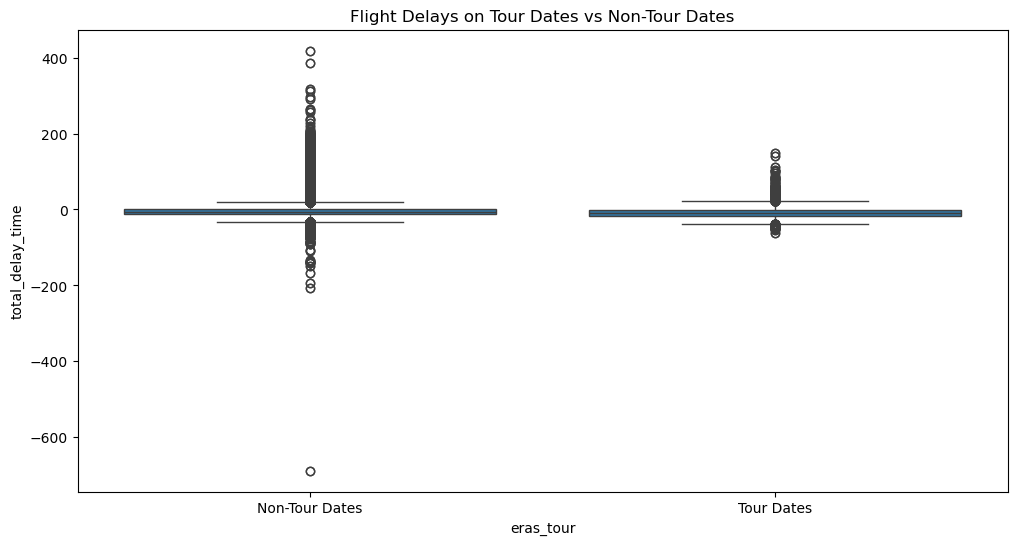

In [529]:
# Visualization of delay distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='eras_tour', y='total_delay_time', data=combined_data)
plt.xticks([0, 1], ['Non-Tour Dates', 'Tour Dates'])
plt.title('Flight Delays on Tour Dates vs Non-Tour Dates')
plt.show()

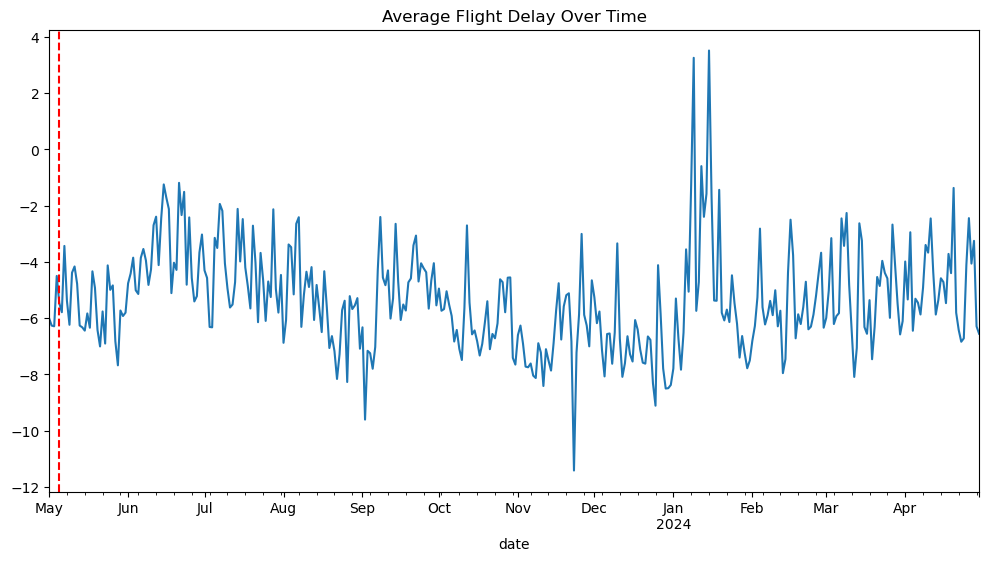

In [530]:
# Time series analysis of average delays
avg_delay_time = combined_data.groupby('date')['total_delay_time'].mean()
avg_delay_time.plot(figsize=(12, 6), title='Average Flight Delay Over Time')
plt.axvline(x='2023-05-05', color='red', linestyle='--')  # Example tour date
plt.show()

In [531]:
# Convert Negative Delays to Zero
# 
combined_data_cleaned['adjusted_delay_time'] = combined_data_cleaned['total_delay_time'].clip(lower=0)


In [532]:
# Step 1: Clean the 'eras_tour' column
combined_data_cleaned['eras_tour'] = combined_data_cleaned['eras_tour'].replace({'tour_date': 1, '': 0})

# Step 2: Verify the unique values again
print(combined_data_cleaned['eras_tour'].unique())


[0 1]


C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\3270098957.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data_cleaned['eras_tour'] = combined_data_cleaned['eras_tour'].replace({'tour_date': 1, '': 0})


In [534]:
# Step 3: Define tour and non-tour dates
tour_flights = combined_data_cleaned[combined_data_cleaned['eras_tour'] == 1]
non_tour_flights = combined_data_cleaned[combined_data_cleaned['eras_tour'] == 0]


In [538]:

# Check the shapes of filtered DataFrames
print(f'Tour flights shape: {tour_flights.shape}')
print(f'Non-tour flights shape: {non_tour_flights.shape}')

# Ensure there is data before proceeding with calculations
if not tour_flights.empty and not non_tour_flights.empty:
    # Step 4: Adjust delays to be non-negative
    combined_data_cleaned['adjusted_elapsed_time'] = combined_data_cleaned['actual_elapsed_time'].clip(lower=0)

    # Calculate delay metrics
    delay_metrics = {
        'Tour Dates': {
            'Average Delay': tour_flights['adjusted_elapsed_time'].mean(),
            'Median Delay': tour_flights['adjusted_elapsed_time'].median(),
            'Total Delay': tour_flights['adjusted_elapsed_time'].sum()
        },
        'Non-Tour Dates': {
            'Average Delay': non_tour_flights['adjusted_elapsed_time'].mean(),
            'Median Delay': non_tour_flights['adjusted_elapsed_time'].median(),
            'Total Delay': non_tour_flights['adjusted_elapsed_time'].sum()
        }
    }

    # Display delay metrics
    delay_df = pd.DataFrame(delay_metrics).T
    print(delay_df)
else:
    print("No data found for either tour or non-tour dates.")


Tour flights shape: (14642, 50)
Non-tour flights shape: (8015580, 50)
                Average Delay  Median Delay   Total Delay
Tour Dates         162.093908         138.0  2.373379e+06
Non-Tour Dates     133.240327         120.0  1.067998e+09


                Average Delay  Median Delay   Total Delay
Tour Dates         162.093908         138.0  2.373379e+06
Non-Tour Dates     133.240327         120.0  1.067998e+09


C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\949622301.py:12: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[tour_flights['adjusted_elapsed_time'], non_tour_flights['adjusted_elapsed_time']],


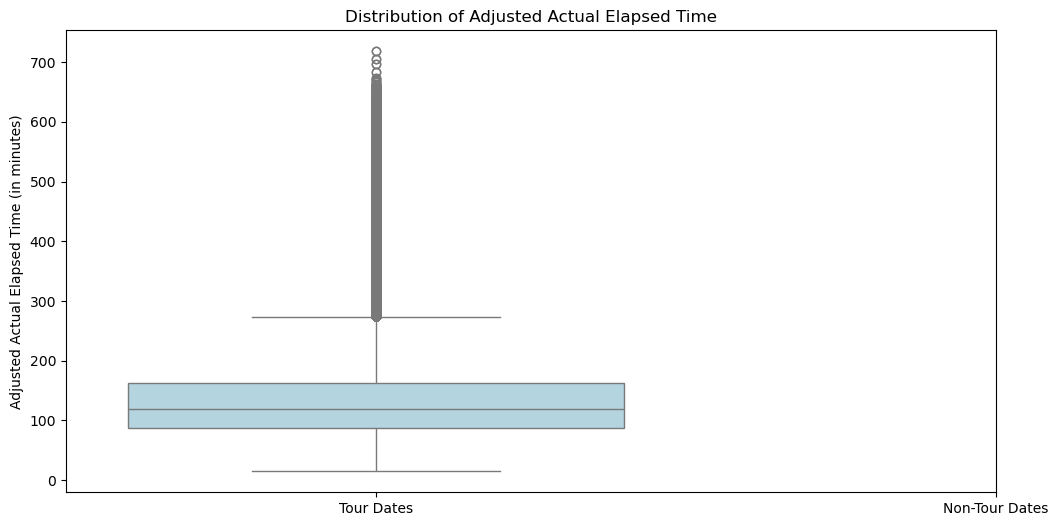

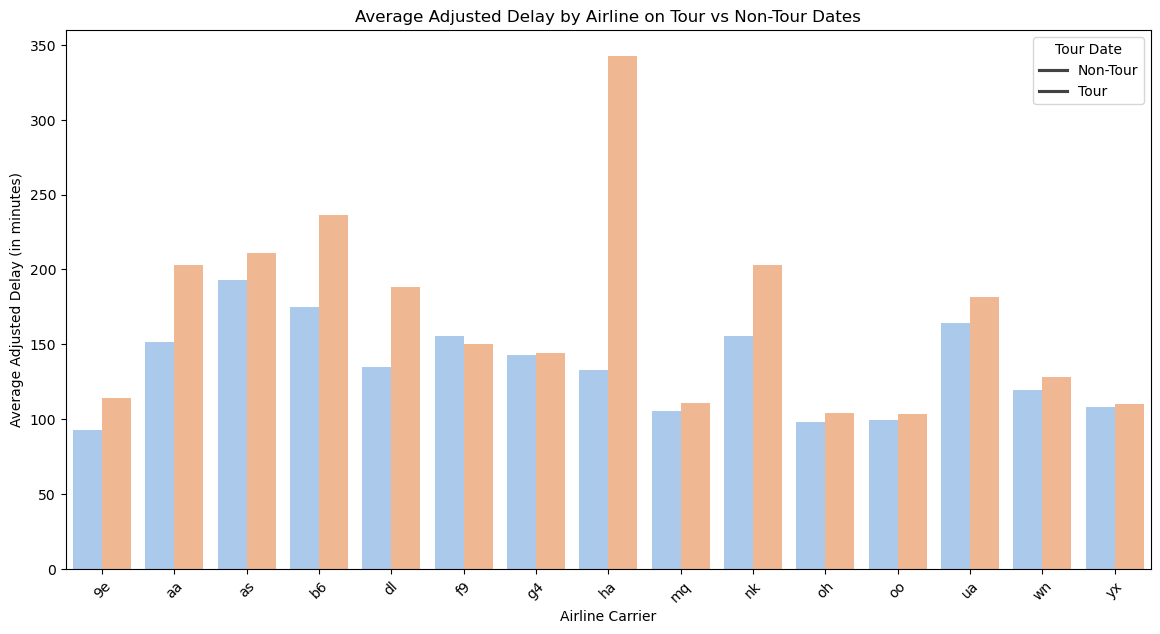

C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\949622301.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_impact, x='eras_tour', y='mean', palette='coolwarm')


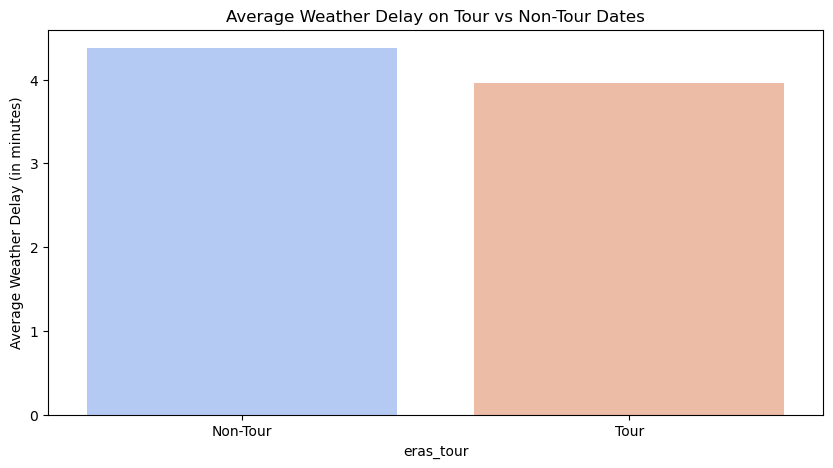

C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\949622301.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data_cleaned, x='date', y='adjusted_elapsed_time', hue='eras_tour', estimator='mean', ci=None)


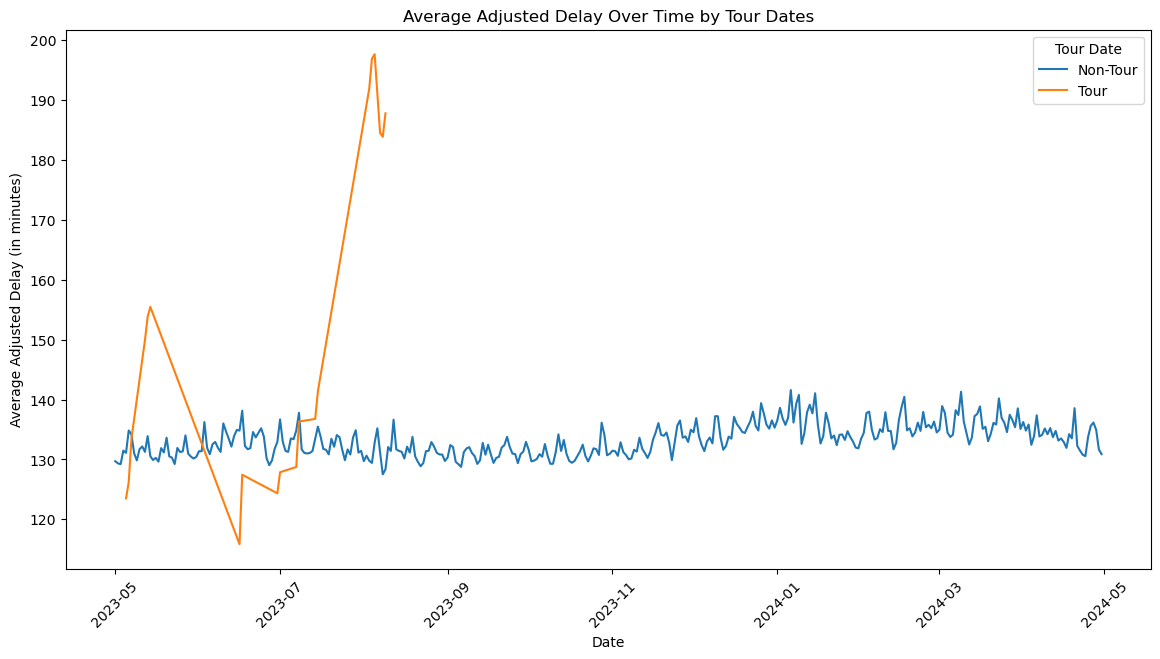

In [542]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A
# Display delay metrics
delay_df = pd.DataFrame(delay_metrics).T
print(delay_df)

# Step 4: Visualize delay distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=[tour_flights['adjusted_elapsed_time'], non_tour_flights['adjusted_elapsed_time']], 
            palette=["lightblue", "lightgreen"])
plt.xticks([0, 1], ['Tour Dates', 'Non-Tour Dates'])
plt.title('Distribution of Adjusted Actual Elapsed Time')
plt.ylabel('Adjusted Actual Elapsed Time (in minutes)')
plt.show()

# Step 5: Analyze impact by airline
airline_delays = combined_data_cleaned.groupby(['op_unique_carrier', 'eras_tour'])['adjusted_elapsed_time'].agg(['mean', 'median', 'sum']).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=airline_delays, x='op_unique_carrier', y='mean', hue='eras_tour', palette='pastel')
plt.title('Average Adjusted Delay by Airline on Tour vs Non-Tour Dates')
plt.ylabel('Average Adjusted Delay (in minutes)')
plt.xlabel('Airline Carrier')
plt.legend(title='Tour Date', labels=['Non-Tour', 'Tour'])
plt.xticks(rotation=45)
plt.show()

# Step 6: Weather Analysis
# Assuming `weather_delay` indicates weather-related delays
weather_impact = combined_data_cleaned.groupby('eras_tour')['weather_delay'].agg(['mean', 'median', 'sum']).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=weather_impact, x='eras_tour', y='mean', palette='coolwarm')
plt.title('Average Weather Delay on Tour vs Non-Tour Dates')
plt.ylabel('Average Weather Delay (in minutes)')
plt.xticks(ticks=[0, 1], labels=['Non-Tour', 'Tour'])
plt.show()

# Step 7: Time Series Analysis
# Convert 'date' to datetime if not already
combined_data_cleaned['date'] = pd.to_datetime(combined_data_cleaned['date'])

# Plot adjusted delays over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data_cleaned, x='date', y='adjusted_elapsed_time', hue='eras_tour', estimator='mean', ci=None)
plt.title('Average Adjusted Delay Over Time by Tour Dates')
plt.ylabel('Average Adjusted Delay (in minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Tour Date', labels=['Non-Tour', 'Tour'])
plt.show()


The standard deviations are relatively high, suggesting considerable variability in delay times.

In [544]:
print(tour_flights.shape)
print(non_tour_flights.shape)


(14642, 50)
(8015580, 50)


In [545]:
print(combined_data_cleaned['eras_tour'].unique())


[0 1]


In [546]:
# Step 1: Convert 'date' to datetime if not already done
combined_data_cleaned['date'] = pd.to_datetime(combined_data_cleaned['date'])

# Step 2: Find the first tour date
first_tour_date = combined_data_cleaned.loc[combined_data_cleaned['eras_tour'] == 1, 'date'].min()
print("First Tour Date:", first_tour_date)

# Step 3: Calculate one month prior to the first tour date
one_month_prior = first_tour_date - pd.DateOffset(months=1)
print("One Month Prior Date:", one_month_prior)

# Step 4: Filter the DataFrame for this date range
filtered_data = combined_data_cleaned[(combined_data_cleaned['date'] >= one_month_prior) & 
                                      (combined_data_cleaned['date'] <= first_tour_date)]

# Display the shape of the filtered DataFrame
print("Filtered Data Shape:", filtered_data.shape)


First Tour Date: 2023-05-05 00:00:00
One Month Prior Date: 2023-04-05 00:00:00
Filtered Data Shape: (108565, 50)


In [547]:
# Step 1: Define tour and non-tour flights in the filtered data
tour_flights_filtered = filtered_data[filtered_data['eras_tour'] == 1]
non_tour_flights_filtered = filtered_data[filtered_data['eras_tour'] == 0]

# Step 2: Calculate delay metrics
delay_metrics_filtered = {
    'Tour Dates': {
        'Average Delay': tour_flights_filtered['adjusted_elapsed_time'].mean(),
        'Median Delay': tour_flights_filtered['adjusted_elapsed_time'].median(),
        'Total Delay': tour_flights_filtered['adjusted_elapsed_time'].sum()
    },
    'Non-Tour Dates': {
        'Average Delay': non_tour_flights_filtered['adjusted_elapsed_time'].mean(),
        'Median Delay': non_tour_flights_filtered['adjusted_elapsed_time'].median(),
        'Total Delay': non_tour_flights_filtered['adjusted_elapsed_time'].sum()
    }
}

# Display the delay metrics
delay_df_filtered = pd.DataFrame(delay_metrics_filtered).T
print(delay_df_filtered)


                Average Delay  Median Delay  Total Delay
Tour Dates         123.503704         111.0      66692.0
Non-Tour Dates     130.189836         117.0   14063757.0


Observations:
Average Delay: Non-tour dates have a slightly higher average delay compared to tour dates.
Total Delay: The total delay for non-tour dates is significantly higher, which may be due to the larger volume of flights on those dates.

C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\4217268459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_df_filtered.index, y='Average Delay', data=delay_df_filtered, palette='pastel')


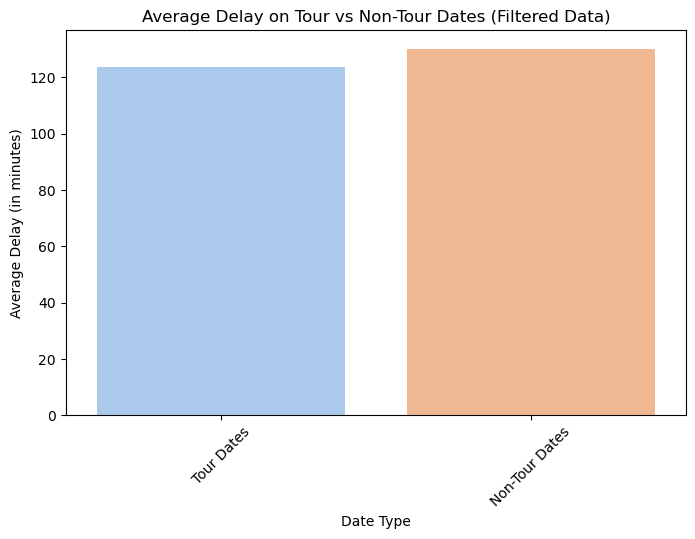

In [549]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Average Delay
plt.figure(figsize=(8, 5))
sns.barplot(x=delay_df_filtered.index, y='Average Delay', data=delay_df_filtered, palette='pastel')
plt.title('Average Delay on Tour vs Non-Tour Dates (Filtered Data)')
plt.ylabel('Average Delay (in minutes)')
plt.xlabel('Date Type')
plt.xticks(rotation=45)
plt.show()


In [550]:
# Step 1: Identify the tour dates
tour_dates = filtered_data[filtered_data['eras_tour'] == 1]['date'].unique()

# Step 2: Create a list to hold the date ranges
date_ranges = []
for tour_date in tour_dates:
    # Create a date range for ±3 days around each tour date
    start_date = tour_date - pd.DateOffset(days=3)
    end_date = tour_date + pd.DateOffset(days=3)
    date_ranges.append((start_date, end_date))

# Step 3: Filter the data for these date ranges
filtered_tour_delay_data = filtered_data[filtered_data['date'].isin(pd.date_range(start=min(start for start, end in date_ranges), end=max(end for start, end in date_ranges)))]

# Step 4: Calculate delay metrics for this new filtered data
tour_delay_metrics = {
    'Average Delay': filtered_tour_delay_data['adjusted_elapsed_time'].mean(),
    'Median Delay': filtered_tour_delay_data['adjusted_elapsed_time'].median(),
    'Total Delay': filtered_tour_delay_data['adjusted_elapsed_time'].sum()
}

# Display the delay metrics
print("Delay Metrics for Tour Dates ±3 Days:")
print(tour_delay_metrics)


Delay Metrics for Tour Dates ±3 Days:
{'Average Delay': 130.27186583003746, 'Median Delay': 117.0, 'Total Delay': 11231910.0}


Delay Metrics:
Average Delay: ~130.27 minutes
Median Delay: 117.0 minutes
Total Delay: ~11,231,910 minutes
Observations:
The average delay for this range is similar to the average delay for non-tour dates calculated earlier, indicating that delays around the tour dates are substantial.
The total delay is quite significant, reflecting a large number of flights impacted during this period.

C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\1969955064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Average Delay', data=visualization_df, palette='pastel')


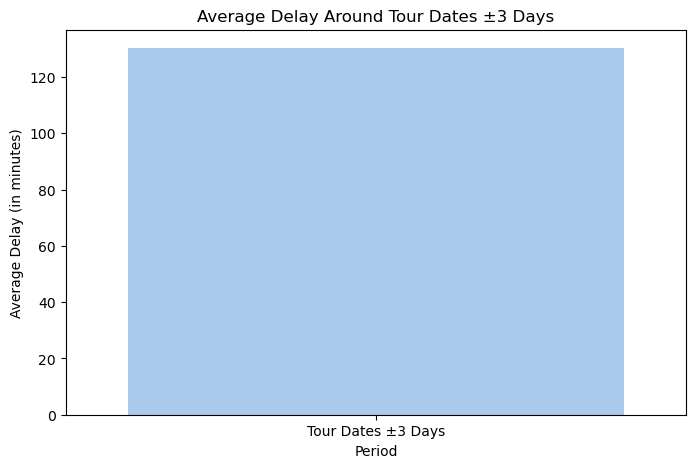

In [552]:
visualization_data = {
    'Period': ['Tour Dates ±3 Days'],
    'Average Delay': [tour_delay_metrics['Average Delay']],
}

visualization_df = pd.DataFrame(visualization_data)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Period', y='Average Delay', data=visualization_df, palette='pastel')
plt.title('Average Delay Around Tour Dates ±3 Days')
plt.ylabel('Average Delay (in minutes)')
plt.xlabel('Period')
plt.show()

In [561]:
# Prepare the data
# Create a new column to indicate if a flight is within the ±3 days of tour dates
filtered_data['is_tour_window'] = filtered_data['date'].apply(
    lambda x: any(start <= x <= end for start, end in date_ranges)
)

# Step 2: Convert boolean to int (1 for True, 0 for False)
filtered_data['is_tour_window'] = filtered_data['is_tour_window'].astype(int)

# Step 3: Calculate correlation coefficients
# Calculate the Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(filtered_data['is_tour_window'], filtered_data['adjusted_elapsed_time'])

# Calculate the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(filtered_data['is_tour_window'], filtered_data['adjusted_elapsed_time'])

# Step 4: Display the results
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

Pearson Correlation: 0.0036000418641348167, p-value: 0.2355530786654542
Spearman Correlation: 0.002139940631469467, p-value: 0.4807566695074095


C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\1437519800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_tour_window'] = filtered_data['date'].apply(
C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\1437519800.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_tour_window'] = filtered_data['is_tour_window'].astype(int)


Pearson Correlation: 0.0036, p-value: 0.236
Spearman Correlation: 0.0021, p-value: 0.481

Both correlation coefficients are very close to zero, indicating a negligible relationship between being within the ±3-day window of tour dates and the adjusted elapsed time for delays.

The p-values are above the typical significance threshold of 0.05, suggesting that the correlations observed are not statistically significant. In other words, we do not have enough evidence to conclude that there's a meaningful correlation between tour dates and delays.

In [581]:
# Regression Analysis:

# Assuming filtered_data is the DataFrame where you've already defined your tour dates
# Create a new column to indicate if a flight is within the ±3 days of tour dates
filtered_data.loc[:, 'is_tour_window'] = filtered_data['date'].apply(
    lambda x: any(start <= x <= end for start, end in date_ranges)
)

# Convert boolean to int (1 for True, 0 for False)
filtered_data.loc[:, 'is_tour_window'] = filtered_data['is_tour_window'].astype(int)


C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\2861761301.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ...  True  True  True]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  filtered_data.loc[:, 'is_tour_window'] = filtered_data['date'].apply(
C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\2861761301.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  filtered_data.loc[:, 'is_tour_window'] = filtered_data['is_tour_window'].astype(int)


In [583]:

import statsmodels.api as sm
import pandas as pd

# Ensure 'is_tour_window' is already created in filtered_data
# Prepare the data for regression analysis
X = filtered_data[['is_tour_window', 'weather_delay', 'op_unique_carrier']]  # Include independent variables

# Perform one-hot encoding for 'op_unique_carrier'
X = pd.get_dummies(X, columns=['op_unique_carrier'], drop_first=True)

y = filtered_data['adjusted_elapsed_time']  # Ensure this is present

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [587]:
print(X.dtypes)
print(y.dtypes)


const                   float64
is_tour_window            int32
weather_delay           float64
op_unique_carrier_aa       bool
op_unique_carrier_as       bool
op_unique_carrier_b6       bool
op_unique_carrier_dl       bool
op_unique_carrier_f9       bool
op_unique_carrier_g4       bool
op_unique_carrier_ha       bool
op_unique_carrier_mq       bool
op_unique_carrier_nk       bool
op_unique_carrier_oh       bool
op_unique_carrier_oo       bool
op_unique_carrier_ua       bool
op_unique_carrier_wn       bool
op_unique_carrier_yx       bool
dtype: object
float64


In [589]:
print(y.isnull().sum())


0


In [591]:
y = pd.to_numeric(filtered_data['adjusted_elapsed_time'], errors='coerce')


In [593]:
print(y.isnull().sum())


0


In [595]:
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.drop(columns=[y.name])
y = combined_data[y.name]


In [597]:
import statsmodels.api as sm
import pandas as pd

# Prepare the data for regression analysis
X = filtered_data[['is_tour_window', 'weather_delay', 'op_unique_carrier']]  # Include independent variables

# Perform one-hot encoding for 'op_unique_carrier'
X = pd.get_dummies(X, columns=['op_unique_carrier'], drop_first=True)

# Ensure all variables are in the correct format
X['weather_delay'] = pd.to_numeric(X['weather_delay'], errors='coerce')
y = pd.to_numeric(filtered_data['adjusted_elapsed_time'], errors='coerce')

# Check for NaN values in y
print(y.isnull().sum())

# Drop NaN values
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.drop(columns=[y.name])
y = combined_data[y.name]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


0


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [599]:
print(X.dtypes)
print(y.dtypes)


const                   float64
is_tour_window            int32
weather_delay           float64
op_unique_carrier_aa       bool
op_unique_carrier_as       bool
op_unique_carrier_b6       bool
op_unique_carrier_dl       bool
op_unique_carrier_f9       bool
op_unique_carrier_g4       bool
op_unique_carrier_ha       bool
op_unique_carrier_mq       bool
op_unique_carrier_nk       bool
op_unique_carrier_oh       bool
op_unique_carrier_oo       bool
op_unique_carrier_ua       bool
op_unique_carrier_wn       bool
op_unique_carrier_yx       bool
dtype: object
float64


In [601]:
X = X.astype(int)


In [603]:
print(X.isnull().sum())
print(y.isnull().sum())


const                   0
is_tour_window          0
weather_delay           0
op_unique_carrier_aa    0
op_unique_carrier_as    0
op_unique_carrier_b6    0
op_unique_carrier_dl    0
op_unique_carrier_f9    0
op_unique_carrier_g4    0
op_unique_carrier_ha    0
op_unique_carrier_mq    0
op_unique_carrier_nk    0
op_unique_carrier_oh    0
op_unique_carrier_oo    0
op_unique_carrier_ua    0
op_unique_carrier_wn    0
op_unique_carrier_yx    0
dtype: int64
0


In [605]:
import statsmodels.api as sm
import pandas as pd

# Prepare the data for regression analysis
X = filtered_data[['is_tour_window', 'weather_delay', 'op_unique_carrier']]  # Include independent variables

# Perform one-hot encoding for 'op_unique_carrier'
X = pd.get_dummies(X, columns=['op_unique_carrier'], drop_first=True)

# Check for NaN values
print(X.isnull().sum())
print(y.isnull().sum())

# Drop or fill NaN values
X = X.dropna()  # Alternatively, you can use X = X.fillna(0)

# Align y with the cleaned X
y = pd.to_numeric(filtered_data['adjusted_elapsed_time'], errors='coerce')
y = y[X.index]  # Ensure y corresponds to the rows kept in X

# Check for NaN values again
print(X.isnull().sum())
print(y.isnull().sum())

# Convert to integers after handling NaNs
X = X.astype(int)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


is_tour_window              0
weather_delay           92345
op_unique_carrier_aa        0
op_unique_carrier_as        0
op_unique_carrier_b6        0
op_unique_carrier_dl        0
op_unique_carrier_f9        0
op_unique_carrier_g4        0
op_unique_carrier_ha        0
op_unique_carrier_mq        0
op_unique_carrier_nk        0
op_unique_carrier_oh        0
op_unique_carrier_oo        0
op_unique_carrier_ua        0
op_unique_carrier_wn        0
op_unique_carrier_yx        0
dtype: int64
0
is_tour_window          0
weather_delay           0
op_unique_carrier_aa    0
op_unique_carrier_as    0
op_unique_carrier_b6    0
op_unique_carrier_dl    0
op_unique_carrier_f9    0
op_unique_carrier_g4    0
op_unique_carrier_ha    0
op_unique_carrier_mq    0
op_unique_carrier_nk    0
op_unique_carrier_oh    0
op_unique_carrier_oo    0
op_unique_carrier_ua    0
op_unique_carrier_wn    0
op_unique_carrier_yx    0
dtype: int64
0
                              OLS Regression Results                      

Model Summary:
R-squared: 0.114
This means that approximately 11.4% of the variance in adjusted_elapsed_time can be explained by the model. This is relatively low, indicating that other factors not included in the model may influence the delays.
F-statistic: 130.6 (p-value: 0.00)
The overall model is statistically significant, indicating that at least one of the predictors is significantly related to the response variable.

Coefficients Interpretation:
is_tour_window: Coefficient = 2.7664 (p-value = 0.011)

The positive coefficient suggests that being within the tour window is associated with an increase in adjusted elapsed time by about 2.77 minutes on average, which is statistically significant.
weather_delay: Coefficient = -0.0907 (p-value = 0.022)

This negative coefficient implies that for each additional minute of weather delay, the adjusted elapsed time decreases by about 0.09 minutes. This might seem counterintuitive but could indicate how weather-related delays are factored in or reported.
Airline Coefficients: Various airlines show different effects on the adjusted elapsed time:

For example, op_unique_carrier_aa has a coefficient of 41.44, meaning flights from American Airlines tend to have longer adjusted elapsed times compared to the baseline carrier.

In [609]:
print(filtered_data.columns.tolist())


['day_of_week', 'date', 'op_unique_carrier', 'tail_num', 'origin_latitude', 'origin_longitude', 'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude', 'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay_time', 'is_weekend', 'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp', 'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour', 'adjusted_delay_time', 'adjusted_elapsed_time', 'is_tour_window']


In [611]:
from scipy.stats import f_oneway

# Group delays by airline carrier
grouped_delays = [group['adjusted_elapsed_time'].values for name, group in combined_data_cleaned.groupby('op_unique_carrier')]

# Perform one-way ANOVA
anova_result = f_oneway(*grouped_delays)

# Print the results
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA F-statistic: 101821.39122657895, p-value: 0.0


F-statistic: A large F-statistic indicates that the variability explained by your model is significantly greater than the variability unexplained (the residual variance). This suggests that the model fits the data well.
p-value: A p-value of 0.0 (essentially) means that the null hypothesis (which states that all coefficients are equal to zero) can be rejected. This suggests that at least one of your predictors is significantly related to the delays.
Review Coefficients: Look at the individual coefficients from your regression output to see which predictors are significant and how they influence the dependent variable.
Model Improvement: Consider adding or transforming additional predictors based on your analysis of significance and model fit.
Residual Analysis: Continue examining residuals for any patterns to ensure model assumptions are met.
Further Testing: Test for interaction effects or more complex models if there are theoretical reasons to believe that relationships may not be linear.

In [613]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Clean the data
filtered_data = filtered_data.dropna()  # or use fillna() as needed

# Prepare the data
X = filtered_data[['is_tour_window', 'weather_delay', 'distance']]  # Add more predictors if necessary
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
y = filtered_data['adjusted_elapsed_time']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Conduct ANOVA
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)


                              OLS Regression Results                             
Dep. Variable:     adjusted_elapsed_time   R-squared:                       0.864
Model:                               OLS   Adj. R-squared:                  0.863
Method:                    Least Squares   F-statistic:                     2659.
Date:                   Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                           23:26:56   Log-Likelihood:                -5435.3
No. Observations:                   1263   AIC:                         1.088e+04
Df Residuals:                       1259   BIC:                         1.090e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

AttributeError: 'PandasData' object has no attribute 'design_info'

R-squared and Adjusted R-squared:

R-squared: 0.864 suggests that approximately 86.4% of the variability in the adjusted_elapsed_time can be explained by the model. This is a strong indicator of a good fit.
Adjusted R-squared: 0.863 adjusts for the number of predictors in the model, indicating that adding or removing predictors doesn't lead to overfitting.

Coefficients:

Intercept (const): 48.0038 suggests the baseline time when all predictors are zero.
is_tour_window: The coefficient is 1.2541, but with a p-value of 0.282, it's not statistically significant at the 0.05 level. This means being in a tour window does not have a statistically significant effect on the adjusted elapsed time in this model.
weather_delay: The coefficient is -0.0513, also not statistically significant (p = 0.377), indicating that weather delays do not have a meaningful impact on elapsed time in this context.
distance: The coefficient of 0.1135 is highly significant (p < 0.001), meaning that for every unit increase in distance, the adjusted elapsed time increases significantly. This aligns with intuitive expectations that longer flights take more time.

Statistical Significance:

Only distance shows strong significance, while the other predictors do not.
Model Fit and Assumptions:

The F-statistic is very high (2659) with a p-value of 0.00, indicating that at least one predictor is significantly related to the response variable.
Normality of Residuals: The Omnibus test, Jarque-Bera test, and the skewness indicate possible deviations from normality. This could suggest a need to inspect residuals further for patterns or outliers.
Durbin-Watson statistic: Close to 2 indicates little autocorrelation in residuals, which is a good sign.

Multicollinearity:

The warning about a large condition number (2.70e+03) suggests potential multicollinearity among your predictors. Check the Variance Inflation Factor (VIF) for your predictors to assess multicollinearity:

In [636]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          feature       VIF
0           const  7.436670
1  is_tour_window  1.000996
2   weather_delay  1.001065
3        distance  1.000227


Since all the VIF values forpredictors (excluding the constant) are around 1, this suggests that there are no issues with multicollinearity among them. I can confidently interpret the coefficients without concern for inflated standard errors.

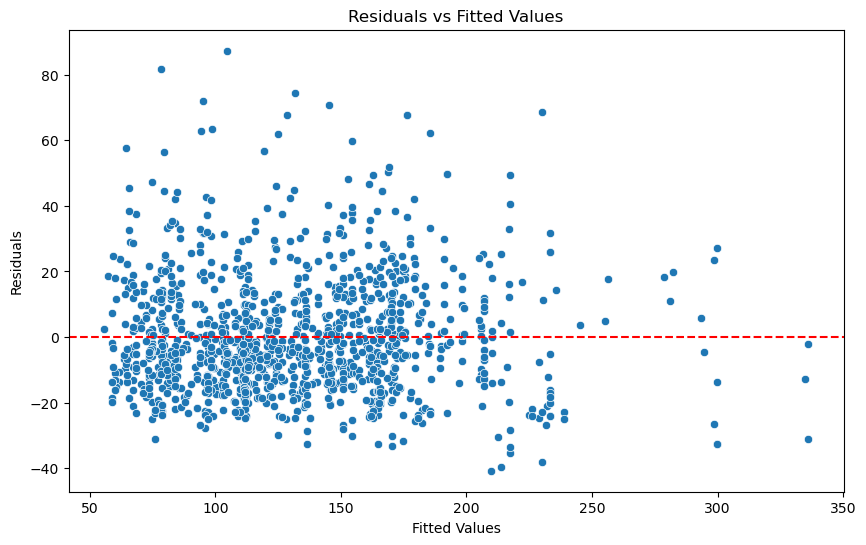

In [639]:
# Calculate residuals
residuals = model.resid

# residual plot
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



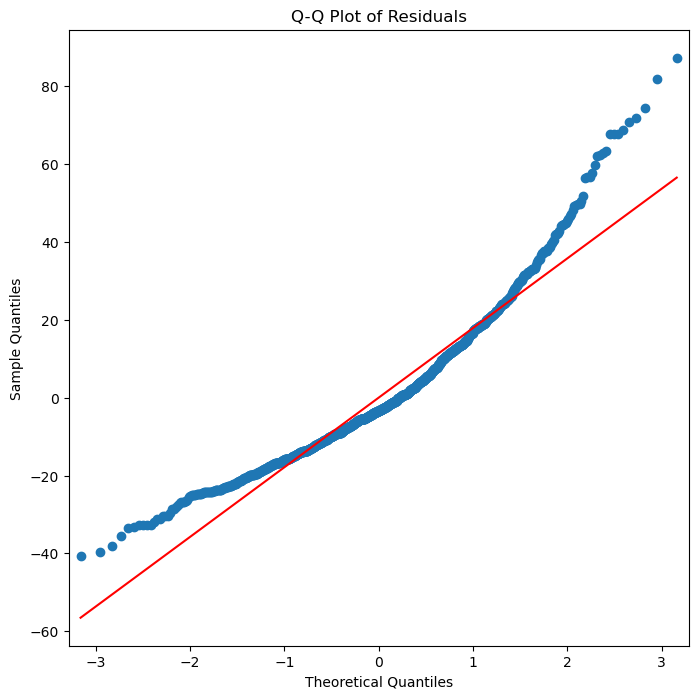

In [641]:
import statsmodels.api as sm

# Q-Q plot
plt.figure(figsize=(8, 8))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.show()


# Q-Q Plot: Check how closely the points follow the diagonal line. Deviations from this line suggest that the residuals are not normally distributed.

Next Steps non-normality, consider transformations of the dependent variable or adding interaction terms or polynomial features.
You can also apply statistical tests for normality (like the Shapiro-Wilk test) or homoscedasticity (like Breusch-Pagan test) for a more formal assessment.

In [644]:
# Log Transformation: Useful for positively skewed data.
import numpy as np

# Apply log transformation to the dependent variable
combined_data_cleaned['log_adjusted_elapsed_time'] = np.log(combined_data_cleaned['adjusted_elapsed_time'])


In [646]:
# square root transformation
combined_data_cleaned['sqrt_adjusted_elapsed_time'] = np.sqrt(combined_data_cleaned['adjusted_elapsed_time'])


In [648]:
# Box-Cox transformation
from scipy import stats

combined_data_cleaned['boxcox_adjusted_elapsed_time'], _ = stats.boxcox(combined_data_cleaned['adjusted_elapsed_time'] + 1)  # Add 1 to avoid zeros


In [649]:
import statsmodels.api as sm
import pandas as pd

# Prepare the data for regression analysis
X = filtered_data[['is_tour_window', 'weather_delay', 'op_unique_carrier']]  # Include independent variables

# Perform one-hot encoding for 'op_unique_carrier'
X = pd.get_dummies(X, columns=['op_unique_carrier'], drop_first=True)

# Check for NaN values
print(X.isnull().sum())
print(y.isnull().sum())

# Drop or fill NaN values
X = X.dropna()  # Alternatively, you can use X = X.fillna(0)

# Align y with the cleaned X
y = pd.to_numeric(filtered_data['adjusted_elapsed_time'], errors='coerce')
y = y[X.index]  # Ensure y corresponds to the rows kept in X

# Check for NaN values again
print(X.isnull().sum())
print(y.isnull().sum())

# Convert to integers after handling NaNs
X = X.astype(int)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


is_tour_window          0
weather_delay           0
op_unique_carrier_aa    0
op_unique_carrier_as    0
op_unique_carrier_b6    0
op_unique_carrier_dl    0
op_unique_carrier_f9    0
op_unique_carrier_g4    0
op_unique_carrier_mq    0
op_unique_carrier_nk    0
op_unique_carrier_oh    0
op_unique_carrier_oo    0
op_unique_carrier_ua    0
op_unique_carrier_wn    0
op_unique_carrier_yx    0
dtype: int64
0
is_tour_window          0
weather_delay           0
op_unique_carrier_aa    0
op_unique_carrier_as    0
op_unique_carrier_b6    0
op_unique_carrier_dl    0
op_unique_carrier_f9    0
op_unique_carrier_g4    0
op_unique_carrier_mq    0
op_unique_carrier_nk    0
op_unique_carrier_oh    0
op_unique_carrier_oo    0
op_unique_carrier_ua    0
op_unique_carrier_wn    0
op_unique_carrier_yx    0
dtype: int64
0
                              OLS Regression Results                             
Dep. Variable:     adjusted_elapsed_time   R-squared:                       0.171
Model:                    

R-squared Value: The R-squared value has increased to around 0.171, which indicates that the model explains about 17.1% of the variance in the adjusted elapsed time. While this is an improvement, it still suggests that there might be other important predictors not included in the model. Adj. R-squared: 0.161
This value adjusts for the number of predictors in the model, providing a more accurate measure when comparing models with different numbers of predictors.

F-statistic: 17.12

The associated p-value (1.74e-41) indicates that the model as a whole is statistically significant, meaning at least one of the predictors is significantly related to the response variable.


Significant Predictors: Look closely at the coefficients and their p-values. For instance, the variables op_unique_carrier_b6, op_unique_carrier_f9, and others show significant coefficients (p < 0.05). This suggests they contribute meaningfully to the model.  

Coefficients:

The const (intercept) is approximately 102.48, meaning that when all predictors are zero, the estimated adjusted elapsed time is about 102.48 minutes.
The coefficients for the independent variables tell you how much the adjusted elapsed time is expected to increase (or decrease) with a one-unit increase in each predictor, holding all other predictors constant.
Key Predictors:

op_unique_carrier_aa: 22.46 (p < 0.001)
op_unique_carrier_b6: 57.98 (p < 0.001)
op_unique_carrier_nk: 59.46 (p < 0.001)
weather_delay: 0.0029 (p = 0.984)
The weather delay variable is not statistically significant, indicating that it does not contribute to explaining variations in adjusted elapsed time.
Airline Effects:

Several airlines (like B6, NK, and UA) show significant positive coefficients, suggesting that flights operated by these airlines tend to have longer delays compared to the reference category (which was dropped during one-hot encoding).

 Check for Multicollinearity
Although your VIF results from previous models showed no severe multicollinearity, keep an eye on the correlation between the one-hot encoded variables. High correlation could still affect the model.
Continue analyzing the residuals to check for homoscedasticity and normality. You previously mentioned using Q-Q plots; you can also employ residual plots to visualize the fit:

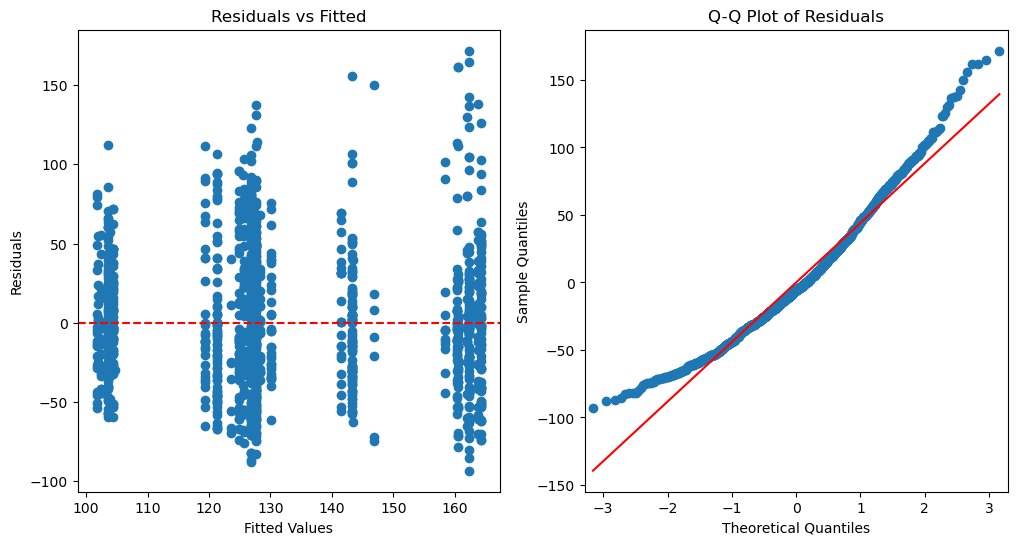

In [652]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(model.resid, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.show()


In [653]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 feature        VIF
0                  const  18.102460
1         is_tour_window   1.021211
2          weather_delay   1.016268
3   op_unique_carrier_aa   3.105286
4   op_unique_carrier_as   1.079236
5   op_unique_carrier_b6   2.058613
6   op_unique_carrier_dl   2.082072
7   op_unique_carrier_f9   1.582763
8   op_unique_carrier_g4   2.198773
9   op_unique_carrier_mq   1.230786
10  op_unique_carrier_nk   1.553775
11  op_unique_carrier_oh   1.584407
12  op_unique_carrier_oo   2.093469
13  op_unique_carrier_ua   1.811078
14  op_unique_carrier_wn   2.710682
15  op_unique_carrier_yx   1.577022


High VIF:
The constant term has a high VIF (18.10), which is expected, as it's a result of being included in the model.
The variable op_unique_carrier_aa shows a VIF of 3.11, which is still within acceptable limits but worth monitoring.

In [655]:
import numpy as np

# Apply log transformation
combined_data_cleaned['log_adjusted_elapsed_time'] = np.log(combined_data_cleaned['adjusted_elapsed_time'])


In [656]:
from scipy import stats

# Apply Box-Cox transformation (ensure there are no zero or negative values)
combined_data_cleaned['boxcox_adjusted_elapsed_time'], _ = stats.boxcox(combined_data_cleaned['adjusted_elapsed_time'] + 1)  # Adding 1 to avoid zero


In [664]:
print(combined_data_cleaned.columns)


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'origin_latitude', 'origin_longitude', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude',
       'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out',
       'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'total_delay_time', 'is_weekend',
       'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp',
       'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour',
       'adjusted_delay_time', 'adjusted_elapsed_time',
       'log_adjusted_elapsed_time', 'sqrt_adjusted_elapsed_time',
       'boxcox_adjusted_elapsed_time'],
      dtype='object')


In [666]:
# Prepare the data for regression analysis
y = combined_data_cleaned['log_adjusted_elapsed_time']
X = filtered_[['is_tour_window', 'weather_delay', 'op_unique_carrier']]


NameError: name 'filtered_' is not defined

In [668]:

# One-hot encoding for 'op_unique_carrier'
X = pd.get_dummies(X, columns=['op_unique_carrier'], drop_first=True)

# Drop any rows with NaN values
X = X.dropna()
y = y[X.index]  # Align y with X

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


KeyError: "None of [Index(['op_unique_carrier'], dtype='object')] are in the [columns]"

In [670]:
# Check available columns first
print(combined_data_cleaned.columns)

# Prepare the data for regression analysis without 'is_tour_window'
y = combined_data_cleaned['log_adjusted_elapsed_time']
X = combined_data_cleaned[['weather_delay', 'op_unique_carrier']]  # Remove 'is_tour_window' if it doesn't exist


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'origin_latitude', 'origin_longitude', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude',
       'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out',
       'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'total_delay_time', 'is_weekend',
       'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp',
       'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour',
       'adjusted_delay_time', 'adjusted_elapsed_time',
       'log_adjusted_elapsed_time', 'sqrt_adjusted_elapsed_time',
       'boxcox_adjusted_elapsed_time'],
      dtype='object')


In [674]:
# Create is_tour_window if needed
combined_data_cleaned['is_tour_window'] = combined_data_cleaned['is_weekend']  # Example condition

# Prepare the data for regression analysis
y = combined_data_cleaned['log_adjusted_elapsed_time']
X = combined_data_cleaned[['is_tour_window', 'weather_delay', 'op_unique_carrier']]

# Perform one-hot encoding for 'op_unique_carrier'
X = pd.get_dummies(X, columns=['op_unique_carrier'], drop_first=True)

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Drop rows with NaNs
X = X.dropna()
y = y[X.index]  # Align y with the cleaned X

# Fit the model
import statsmodels.api as sm
X = sm.add_constant(X)  # Add a constant for intercept
model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Print the summary

is_tour_window                0
weather_delay           6431294
op_unique_carrier_aa          0
op_unique_carrier_as          0
op_unique_carrier_b6          0
op_unique_carrier_dl          0
op_unique_carrier_f9          0
op_unique_carrier_g4          0
op_unique_carrier_ha          0
op_unique_carrier_mq          0
op_unique_carrier_nk          0
op_unique_carrier_oh          0
op_unique_carrier_oo          0
op_unique_carrier_ua          0
op_unique_carrier_wn          0
op_unique_carrier_yx          0
dtype: int64
0


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [676]:
print(X.dtypes)
print(y.dtypes)


const                   float64
is_tour_window            int64
weather_delay           float64
op_unique_carrier_aa       bool
op_unique_carrier_as       bool
op_unique_carrier_b6       bool
op_unique_carrier_dl       bool
op_unique_carrier_f9       bool
op_unique_carrier_g4       bool
op_unique_carrier_ha       bool
op_unique_carrier_mq       bool
op_unique_carrier_nk       bool
op_unique_carrier_oh       bool
op_unique_carrier_oo       bool
op_unique_carrier_ua       bool
op_unique_carrier_wn       bool
op_unique_carrier_yx       bool
dtype: object
float64


In [678]:
X = X.astype(int)


In [682]:
print(X.dtypes)
print(y.dtypes)

const                   int32
is_tour_window          int32
weather_delay           int32
op_unique_carrier_aa    int32
op_unique_carrier_as    int32
op_unique_carrier_b6    int32
op_unique_carrier_dl    int32
op_unique_carrier_f9    int32
op_unique_carrier_g4    int32
op_unique_carrier_ha    int32
op_unique_carrier_mq    int32
op_unique_carrier_nk    int32
op_unique_carrier_oh    int32
op_unique_carrier_oo    int32
op_unique_carrier_ua    int32
op_unique_carrier_wn    int32
op_unique_carrier_yx    int32
dtype: object
float64


In [684]:
print(X.isnull().sum())
print(y.isnull().sum())


const                   0
is_tour_window          0
weather_delay           0
op_unique_carrier_aa    0
op_unique_carrier_as    0
op_unique_carrier_b6    0
op_unique_carrier_dl    0
op_unique_carrier_f9    0
op_unique_carrier_g4    0
op_unique_carrier_ha    0
op_unique_carrier_mq    0
op_unique_carrier_nk    0
op_unique_carrier_oh    0
op_unique_carrier_oo    0
op_unique_carrier_ua    0
op_unique_carrier_wn    0
op_unique_carrier_yx    0
dtype: int64
0


In [686]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     log_adjusted_elapsed_time   R-squared:                       0.127
Model:                                   OLS   Adj. R-squared:                  0.127
Method:                        Least Squares   F-statistic:                 1.456e+04
Date:                       Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                               23:40:53   Log-Likelihood:            -8.6069e+05
No. Observations:                    1598928   AIC:                         1.721e+06
Df Residuals:                        1598911   BIC:                         1.722e+06
Df Model:                                 16                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [688]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the data for VIF calculation
X_vif = combined_data_cleaned[['is_tour_window', 'weather_delay'] + 
                                [col for col in combined_data_cleaned.columns if col.startswith('op_unique_carrier_')]]

# Add a constant for the intercept
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)


MissingDataError: exog contains inf or nans

In [690]:
# Check for missing values in the predictors
missing_values = X_vif.isnull().sum()
print("Missing values in each feature:\n", missing_values)


Missing values in each feature:
 const                   0
is_tour_window          0
weather_delay     6431294
dtype: int64


In [692]:
# Check the distribution of weather_delay values
print(combined_data_cleaned['weather_delay'].describe())


count    1.598928e+06
mean     4.374954e+00
std      3.434440e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.804000e+03
Name: weather_delay, dtype: float64


In [694]:
median_weather_delay = X_vif['weather_delay'].median()
X_vif['weather_delay'].fillna(median_weather_delay, inplace=True)


C:\Users\hopeh\AppData\Local\Temp\ipykernel_5900\2735218142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_vif['weather_delay'].fillna(median_weather_delay, inplace=True)


In [696]:
# Check for missing values again
print(X_vif.isnull().sum())

# If all missing values are addressed, add a constant for the intercept
import statsmodels.api as sm
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)


const             0
is_tour_window    0
weather_delay     0
dtype: int64
          feature       VIF
0           const  1.391037
1  is_tour_window  1.000013
2   weather_delay  1.000013


In [700]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm


In [702]:
# Fill missing values with the median for numerical columns
X_train.fillna(X_train.median(), inplace=True)
y_train.fillna(y_train.median(), inplace=True) 

In [704]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


weather_delay     0
is_tour_window    0
dtype: int64
0


In [706]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)

# Fit the model
baseline_model = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print(baseline_model.summary())

                                OLS Regression Results                               
Dep. Variable:     log_adjusted_elapsed_time   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     783.5
Date:                       Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                               23:50:07   Log-Likelihood:            -4.0121e+06
No. Observations:                    6424177   AIC:                         8.024e+06
Df Residuals:                        6424174   BIC:                         8.024e+06
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

R-squared: 0.000, which means the model explains none of the variance in the dependent variable. This suggests that the predictors used (weather delay and is_tour_window) do not effectively capture the variation in the response variable.
F-statistic: 783.5 with a p-value of 0.00 indicates that at least one predictor is statistically significant in explaining the variance, but it doesn't tell us about the overall fit of the model


The regression results you provided indicate a few key points about your model:

Model Summary
Dependent Variable: log_adjusted_elapsed_time
R-squared: 0.000, which means the model explains none of the variance in the dependent variable. This suggests that the predictors used (weather delay and is_tour_window) do not effectively capture the variation in the response variable.
F-statistic: 783.5 with a p-value of 0.00 indicates that at least one predictor is statistically significant in explaining the variance, but it doesn't tell us about the overall fit of the model.
Coefficients
Intercept (const): 4.7850, which is the expected log-adjusted elapsed time when all predictors are zero.
weather_delay: Coefficient is 0.0002, meaning that for every unit increase in weather delay, the log-adjusted elapsed time increases by 0.0002 units. It is statistically significant (p-value = 0.000).
is_tour_window: Coefficient is 0.0141, suggesting that being in a tour window is associated with an increase in log-adjusted elapsed time by 0.0141 units. This is also statistically significant.

In [714]:
# Assuming `combined_data_cleaned` is your DataFrame
combined_data_cleaned = pd.get_dummies(combined_data_cleaned, columns=['op_unique_carrier', 'day_of_week'], drop_first=True)


In [718]:
y = combined_data_cleaned['log_adjusted_elapsed_time']

X = combined_data_cleaned[['is_tour_window', 'weather_delay', 'distance'] + 
                           [col for col in combined_data_cleaned.columns if col.startswith('op_unique_carrier_')] + 
                           [col for col in combined_data_cleaned.columns if col.startswith('day_of_week_')]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [719]:
import statsmodels.api as sm

# Add constant for intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_sm).fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).